# Regression modeling

## 1. Linear Regression

In [2]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [3]:
DPP_DTT_df = pd.read_csv("combined_df_DPP_DTT_step.csv")
DPP_DTT_df

solution_concentration  polymer_mw  polymer_mn  polymer_dispersity  \
0                      4.00      299.00      90.000                3.32   
1                      4.00      299.00      90.000                3.32   
2                      4.00      299.00      90.000                3.32   
3                      4.00      299.00      90.000                3.32   
4                      4.00      299.00      90.000                3.32   
5                      4.00      299.00      90.000                3.32   
6                      4.00      299.00      90.000                3.32   
7                      4.00      299.00      90.000                3.32   
8                      4.00      299.00      90.000                3.32   
9                      4.00      299.00      90.000                3.32   
10                     4.00      299.00      90.000                3.32   
11                     5.00      292.20      74.900                3.90   
12                     5.00      292.20      74.900                3.90   
13                     5.00      292.20      74.900                3.90   
14                     5.00      292.20      74.900                3.90   
15                     5.00      292.20      74.900                3.90   
16                     5.00      292.20      74.900                3.90   
17                     5.00      292.20      74.900                3.90   
18                     5.00      292.20      74.900                3.90   
19                     5.00      292.20      74.900                3.90   
20                     5.00      501.00     110.000                4.55   
21                     5.00      501.00     110.000                4.55   
22                     5.00      501.00     110.000                4.55   
23                     5.00      501.00     110.000                4.55   
24                     5.00      501.00     110.000                4.55   
25                     5.00      501.00     110.000                4.55   
26                     5.00      501.00     110.000                4.55   
27                     5.00      501.00     110.000                4.55   
28                     5.00      501.00     110.000                4.55   
29                     5.00      501.00     110.000                4.55   
30                     5.00      501.00     110.000                4.55   
31                     4.00      199.00      55.000                3.62   
32                     4.00      199.00      55.000                3.62   
33                     4.00      199.00      55.000                3.62   
34                     4.00      199.00      55.000                3.62   
35                     4.00      199.00      55.000                3.62   
36                     4.00      199.00      55.000                3.62   
37                     4.00      199.00      55.000                3.62   
38                     4.00      199.00      55.000                3.62   
39                     3.00      290.00     143.000                2.03   
40                     3.00      290.00     143.000                2.03   
41                     7.00      290.00     143.000                2.03   
42                     7.00      290.00     143.000                2.03   
43                     6.50      100.00      67.000                3.00   
44                     1.60      279.00      77.000                3.65   
45                     1.60      279.00      77.000                3.65   
46                     0.50      102.00      43.000                2.00   
47                     0.75      102.00      43.000                2.00   
48                     1.00      102.00      43.000                2.00   
49                     2.00      102.00      43.000                2.00   
50                     5.00      102.00      43.000                2.00   
51                     0.50      102.00      43.000                2.00   
52                     0.75   

In [4]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_mn',
 'polymer_dispersity',
 'hole_mobility',
 'solution_treatment',
 'substrate_pretreatment',
 'post_process',
 'channel_width',
 'channel_length',
 'dielectric_thickness',
 'film_deposition_type_drop',
 'film_deposition_type_spin',
 'dielectric_material_SiO2',
 'electrode_configuration_BGBC',
 'electrode_configuration_BGTC',
 'electrode_configuration_TGBC',
 'gate_material_Other',
 'film_deposition_type_MGC',
 'dielectric_material_other',
 'solvent_boiling_point',
 'blend_conjugated_polymer',
 'insulating_polymer',
 'treatment_type_sam',
 'treatment_type_plasma',
 'treatment_type_uv_ozone',
 'solution_treatment_poor_solvent',
 'solution_treatment_aging',
 'solution_treatment_sonication',
 'solution_treatment_mixing',
 'solution_treatment_uv_irradiation']

In [5]:
DPP_DTT_Y = DPP_DTT_df[['hole_mobility']]
DPP_DTT_X = DPP_DTT_df.drop(labels = 'hole_mobility', axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)

Y_pred = LR_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.1918909745072344
R^2 Score: -0.49129270599312647


## Polynomial regression

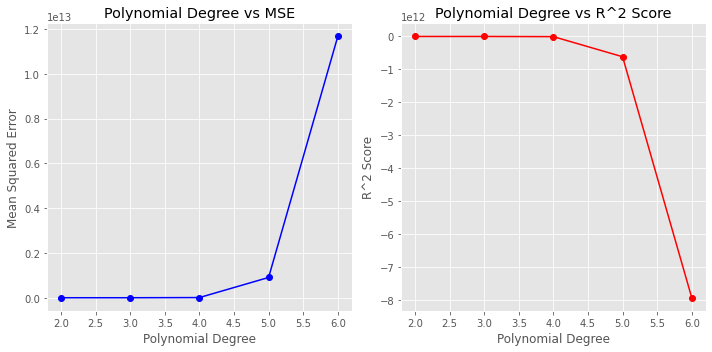

[13961.812147355535, 139977.0785412385, 7800199610.731231, 905085662169.2538, 11667084822409.51]
[-9498.171655870523, -95234.93949817916, -5307007017.170244, -615791415717.2968, -7937912377129.866]


In [8]:
from sklearn.preprocessing import PolynomialFeatures

degrees = range(2, 7)  # Polynomial degrees from 2 to 10
mse_values = []  # To store mean squared error values
r2_values = []  # To store R^2 values

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(DPP_DTT_X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, DPP_DTT_Y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting Polynomial Degree vs MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(degrees, mse_values, marker='o', linestyle='-', color='b')
plt.title('Polynomial Degree vs MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')

# Plotting Polynomial Degree vs R^2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(degrees, r2_values, marker='o', linestyle='-', color='r')
plt.title('Polynomial Degree vs R^2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(mse_values)
print(r2_values)

## Ridge regression

[-0.5061864906909395, -0.4800392494717596, -0.44631235539096314, -0.41318641692930225, -0.38273750648985305, -0.3552945049958387, -0.3306653368367156, -0.3085243849005468, -0.28853998663390645, -0.27041400653511527]


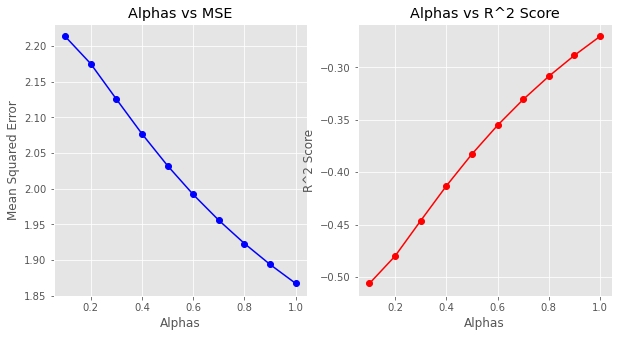

In [9]:
from sklearn.linear_model import Ridge

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

alphas = np.arange(0.1, 1.1, 0.1)

mse_scores = []
r2_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_scores, marker='o', linestyle='-', color='b')
plt.title('Alphas vs MSE')
plt.xlabel('Alphas')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_scores, marker='o', linestyle='-', color='r')
plt.title('Alphas vs R^2 Score')
plt.xlabel('Alphas')
plt.ylabel('R^2 Score')
print(r2_scores)

## Lasso regression

[0.15118718934006126, 0.1592715208498785, 0.16151993897525063, 0.1632398733597974, 0.16482394872555173, 0.16628103812498674, 0.1676111415581033, 0.16881425902490033, 0.16989039052537902, 0.1708395360595375]


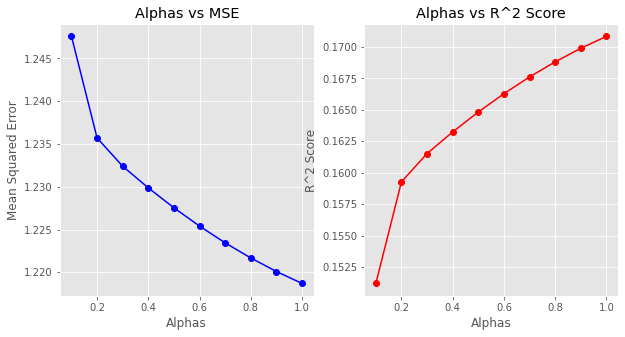

In [10]:
from sklearn.linear_model import Lasso

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

alphas = np.arange(0.1, 1.1, 0.1)

mse_scores = []
r2_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_scores, marker='o', linestyle='-', color='b')
plt.title('Alphas vs MSE')
plt.xlabel('Alphas')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_scores, marker='o', linestyle='-', color='r')
plt.title('Alphas vs R^2 Score')
plt.xlabel('Alphas')
plt.ylabel('R^2 Score')
print(r2_scores)

## Elsaticnet regression

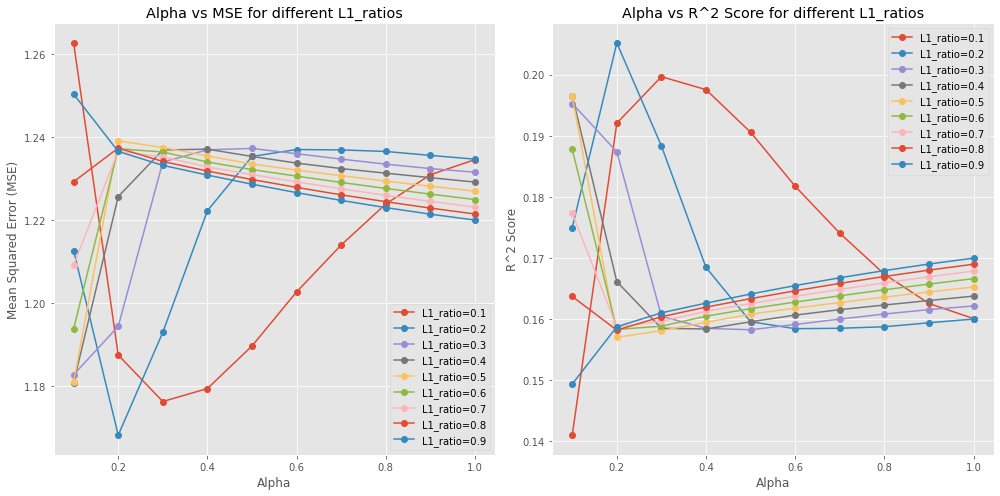

{0.1: [0.14097272686590123, 0.1920685193451689, 0.1996726623942806, 0.19755210106696264, 0.1905811727806911, 0.18172834237972058, 0.1740486245333268, 0.16733664829632588, 0.1625405744733699, 0.1600681745156034], 0.2: [0.17497176712701812, 0.20518871325124977, 0.18833965786490225, 0.1684371417311319, 0.1595479195320163, 0.15841267780884927, 0.15847810464023393, 0.15872869296764713, 0.15937489167259222, 0.15999248469224425], 0.30000000000000004: [0.19528186682709736, 0.18736587543523497, 0.1604636056982437, 0.15846569352288165, 0.15823521716896394, 0.15910138460388756, 0.15998058599498588, 0.16081030177595068, 0.1615326942770925, 0.16212694749095058], 0.4: [0.19657464476661424, 0.1661218894904124, 0.15848094042031524, 0.15835726523037552, 0.15954277522431592, 0.1606342643369073, 0.16152932440162382, 0.1622869876830737, 0.16302330345788107, 0.16374757782323923], 0.5: [0.19651914486269906, 0.15699578947124082, 0.15809073832405796, 0.15945247124523498, 0.16079095211238514, 0.161780795660418

In [11]:
from sklearn.linear_model import ElasticNet

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1, 0.1)

mse_scores = {l1_ratio: [] for l1_ratio in l1_ratios}
r2_scores = {l1_ratio: [] for l1_ratio in l1_ratios}

for l1_ratio in l1_ratios:
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)
        
        mse_scores[l1_ratio].append(mse)
        r2_scores[l1_ratio].append(r2)

plt.figure(figsize=(14, 7))

# MSE plot
plt.subplot(1, 2, 1)
for l1_ratio in l1_ratios:
    plt.plot(alphas, mse_scores[l1_ratio], label=f'L1_ratio={l1_ratio:.1f}', marker = 'o')
plt.title('Alpha vs MSE for different L1_ratios')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

# R^2 score plot
plt.subplot(1, 2, 2)
for l1_ratio in l1_ratios:
    plt.plot(alphas, r2_scores[l1_ratio], label=f'L1_ratio={l1_ratio:.1f}', marker = 'o')
plt.title('Alpha vs R^2 Score for different L1_ratios')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()
print(r2_scores)

## Support Vector Regression (SVR)

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

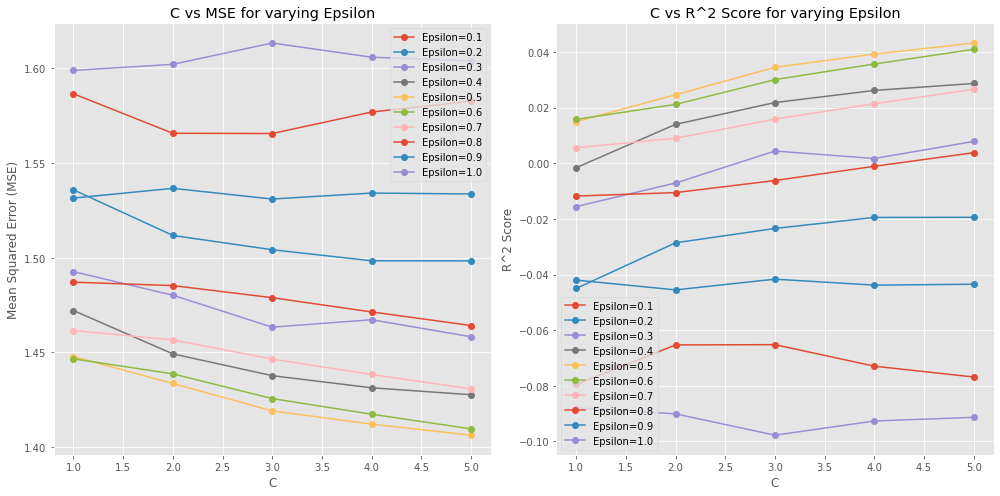

[[-0.07950619 -0.04498312 -0.01556395 -0.00157695  0.01497221  0.01578083
   0.00559417 -0.0117781  -0.04200194 -0.08788596]
 [-0.06529953 -0.02858369 -0.00709124  0.01399004  0.02463344  0.02116966
   0.00898072 -0.01055163 -0.04551247 -0.09008719]
 [-0.0652057  -0.0234407   0.00439383  0.02182667  0.03449096  0.03007122
   0.01586786 -0.00620035 -0.04166094 -0.09774743]
 [-0.07293797 -0.01947175  0.00170888  0.02618568  0.03924935  0.03567723
   0.02140169 -0.00108805 -0.04380976 -0.09264612]
 [-0.07683488 -0.01942798  0.00784458  0.02867859  0.04322549  0.04094985
   0.02659224  0.00379831 -0.04348396 -0.09132482]]


In [12]:
from sklearn.svm import SVR

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

C_values = np.arange(1.0, 6.0, 1)
epsilon_values = np.arange(0.1, 1.1, 0.1)

mse_scores = np.zeros((len(C_values), len(epsilon_values)))
r2_scores = np.zeros((len(C_values), len(epsilon_values)))

for i, C in enumerate(C_values):
    for j, epsilon in enumerate(epsilon_values):
        svr_model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr_model.fit(X_train, Y_train)
        Y_pred = svr_model.predict(X_test)
        mse_scores[i, j] = mean_squared_error(Y_test, Y_pred)
        r2_scores[i, j] = r2_score(Y_test, Y_pred)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for j, epsilon in enumerate(epsilon_values):
    plt.plot(C_values, mse_scores[:, j], label=f'Epsilon={epsilon:.1f}', marker = 'o')
plt.title('C vs MSE for varying Epsilon')
plt.xlabel('C')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
for j, epsilon in enumerate(epsilon_values):
    plt.plot(C_values, r2_scores[:, j], label=f'Epsilon={epsilon:.1f}', marker = 'o')
plt.title('C vs R^2 Score for varying Epsilon')
plt.xlabel('C')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()
print(r2_scores)

## Decision tree regression

In [13]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, Y_train)

Y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.6582505097756195
R^2 Score: 0.5521473488592082


## Random forest regression

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


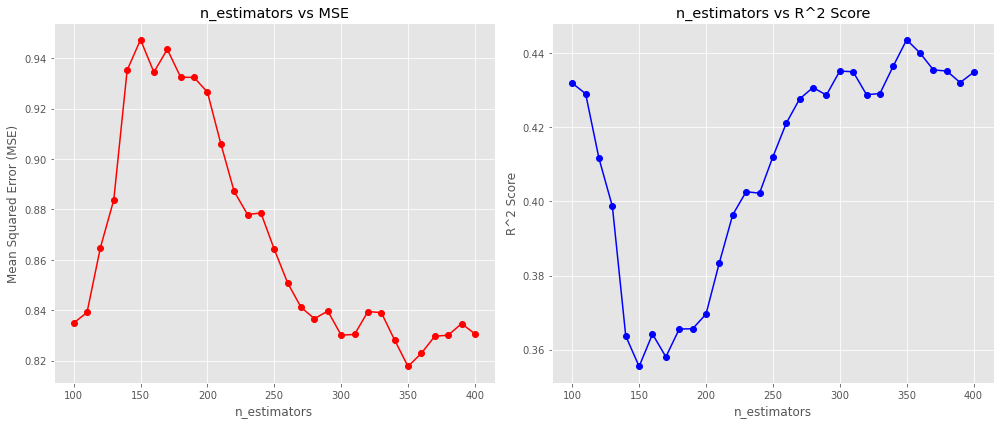

[0.43194582409268467, 0.42908753918281495, 0.41160829453919234, 0.3986933128171216, 0.36368372073212385, 0.35545594225691746, 0.36420521334387, 0.35804244360911075, 0.365565418423372, 0.3656308737076249, 0.3695928400764551, 0.38350101682131665, 0.3964172887697266, 0.40263855224995426, 0.4022380199244332, 0.41204947022077676, 0.42112658159240535, 0.4276908581689135, 0.43076473431277207, 0.4287168141858009, 0.43521383621870124, 0.4350163693171101, 0.4288401147338181, 0.42912513882685377, 0.4365612738333293, 0.4436651939015812, 0.4400861160773817, 0.4354997794605526, 0.43522717300735325, 0.43210835448796314, 0.4348466112234004]


In [14]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

n_estimators_range = range(100, 410, 10)

mse_scores = []
r2_scores = []

for n_estimators in n_estimators_range:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, Y_train)
    Y_pred = rf_regressor.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('n_estimators vs MSE')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error (MSE)')

# Plotting n_estimators vs R^2
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('n_estimators vs R^2 Score')
plt.xlabel('n_estimators')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

## Gradient bossting regression

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

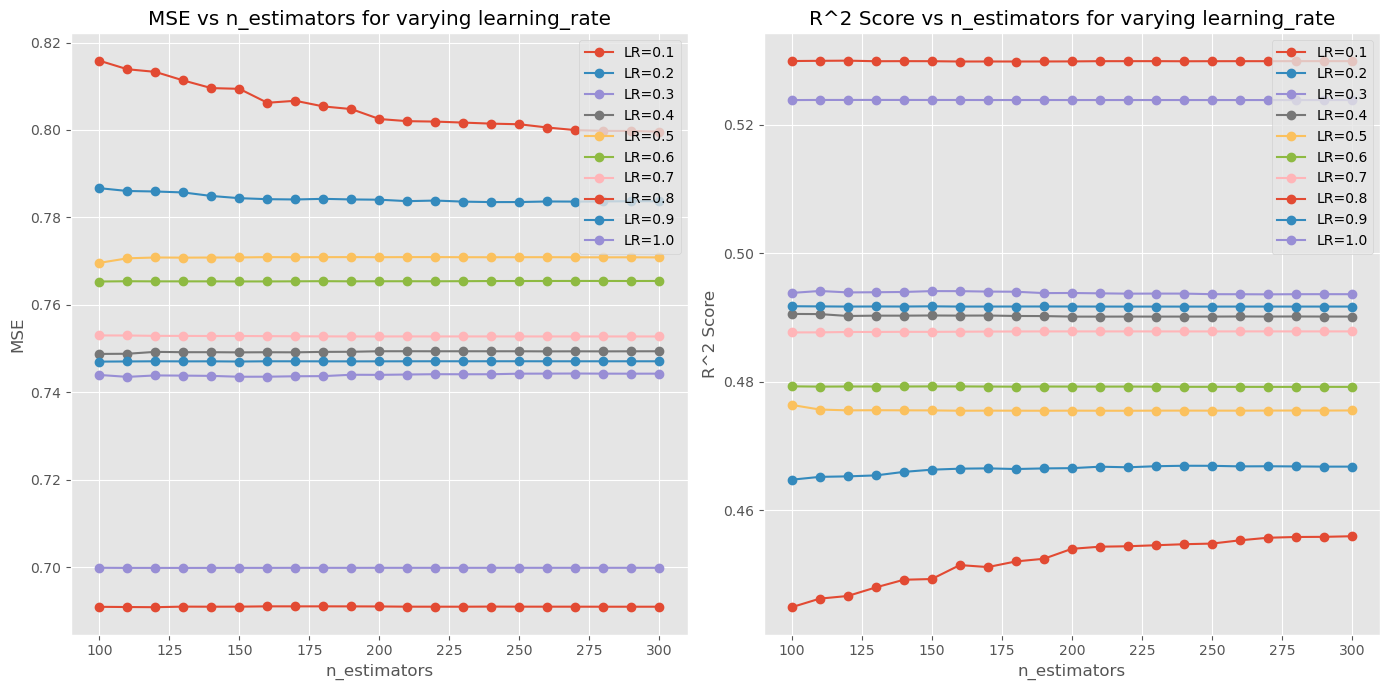

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

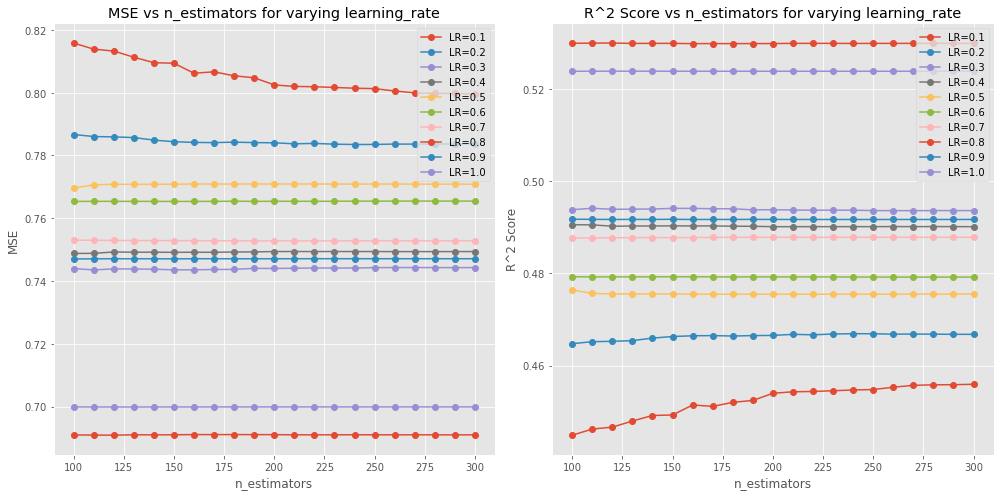

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Parameter ranges
n_estimators_range = range(100, 310, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
fixed_max_depth = 3 

# Initialize storage for performance metrics
mse_scores = np.zeros((len(learning_rate_range), len(n_estimators_range)))
r2_scores = np.zeros((len(learning_rate_range), len(n_estimators_range)))

# Evaluate model performance over varying n_estimators and learning_rate
for i, learning_rate in enumerate(learning_rate_range):
    for j, n_estimators in enumerate(n_estimators_range):
        model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=fixed_max_depth, random_state=42)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse_scores[i, j] = mean_squared_error(Y_test, Y_pred)
        r2_scores[i, j] = r2_score(Y_test, Y_pred)

# Plotting
plt.figure(figsize=(14, 7))

# MSE Plot
plt.subplot(1, 2, 1)
for i, learning_rate in enumerate(learning_rate_range):
    plt.plot(n_estimators_range, mse_scores[i, :], label=f'LR={learning_rate:.1f}', marker = 'o')
plt.title('MSE vs n_estimators for varying learning_rate')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend()

# R^2 Score Plot
plt.subplot(1, 2, 2)
for i, learning_rate in enumerate(learning_rate_range):
    plt.plot(n_estimators_range, r2_scores[i, :], label=f'LR={learning_rate:.1f}', marker = 'o')
plt.title('R^2 Score vs n_estimators for varying learning_rate')
plt.xlabel('n_estimators')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConver

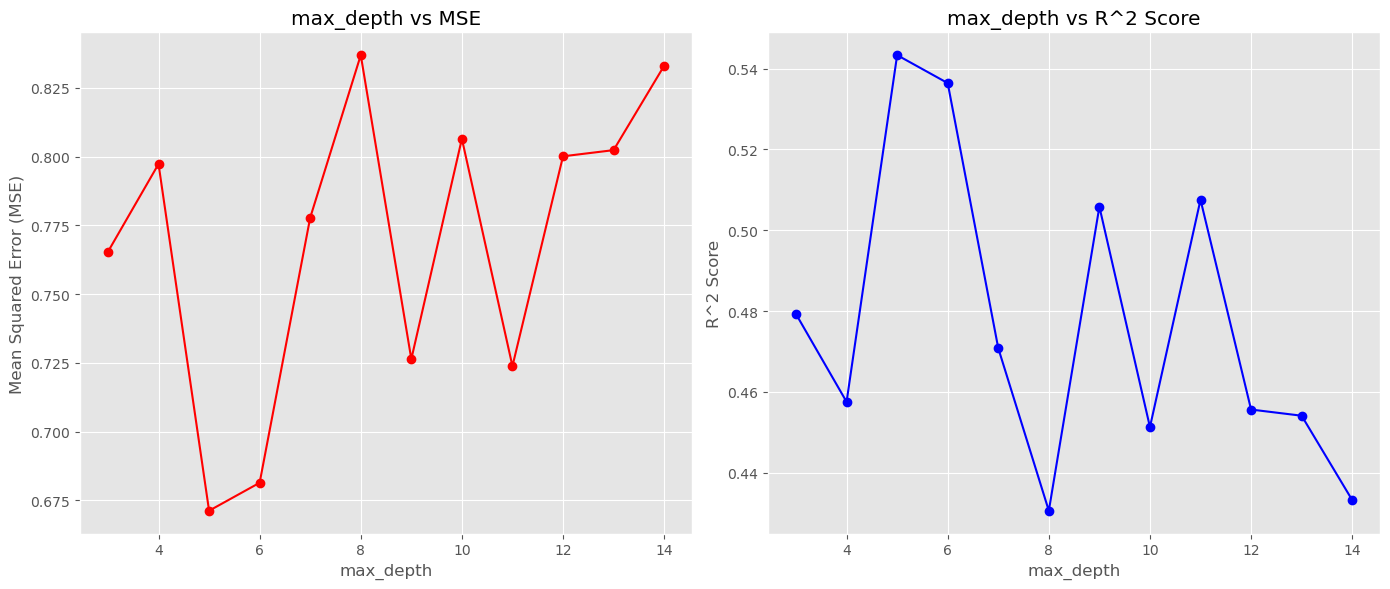

[0.47924095001349154, 0.45752572258062796, 0.5433442705755389, 0.536418409241354, 0.4708020133416059, 0.43057313140347586, 0.5058128234289148, 0.4512883502950915, 0.5075474663781967, 0.4556203153077657, 0.45409203466470127, 0.4332176740591952]


In [8]:
from sklearn.ensemble import GradientBoostingRegressor

fixed_learning_rate = 0.6
fixed_n_estimators = 210
max_depth_range = range(3, 15)

mse_scores = []
r2_scores = []

for max_depth in max_depth_range:
    model = GradientBoostingRegressor(n_estimators=fixed_n_estimators, learning_rate=fixed_learning_rate, max_depth=max_depth, random_state=42)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(max_depth_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('max_depth vs MSE')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(max_depth_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('max_depth vs R^2 Score')
plt.xlabel('max_depth')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


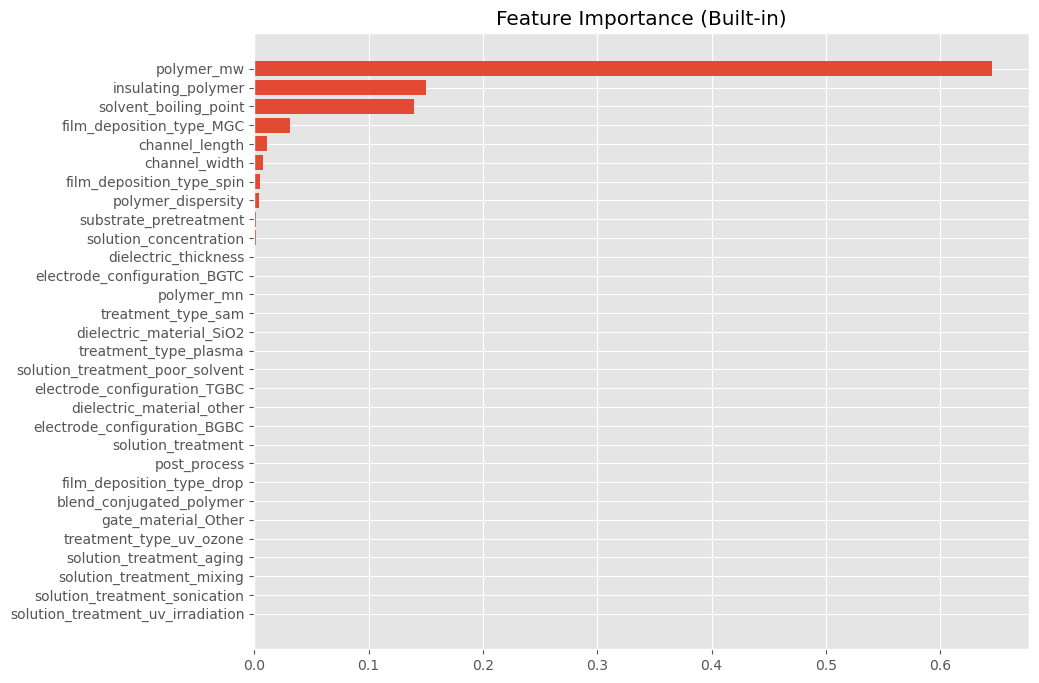

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

fixed_learning_rate = 0.6
fixed_n_estimators = 210
max_depth = 4

model = GradientBoostingRegressor(n_estimators=fixed_n_estimators, learning_rate=fixed_learning_rate, max_depth=max_depth, random_state=42)

model.fit(X_train, Y_train)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance (Built-in)')
plt.show()

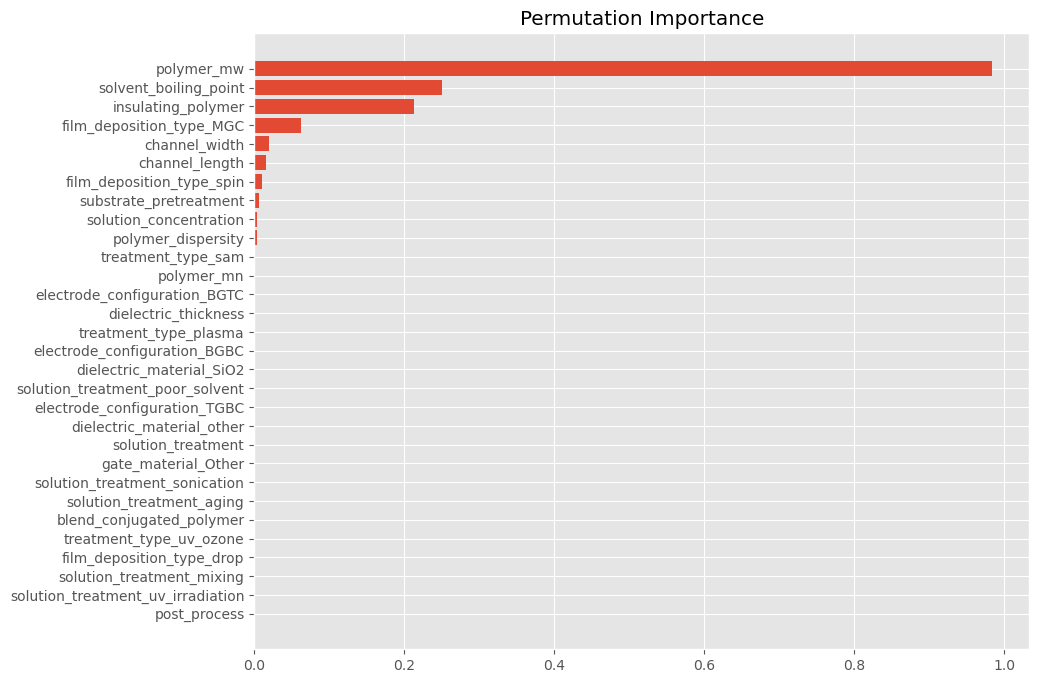

In [9]:
result = permutation_importance(model, X_train, Y_train, n_repeats=10)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10,8))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Permutation Importance')
plt.show()

## K-nearest Neighbors Regression

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


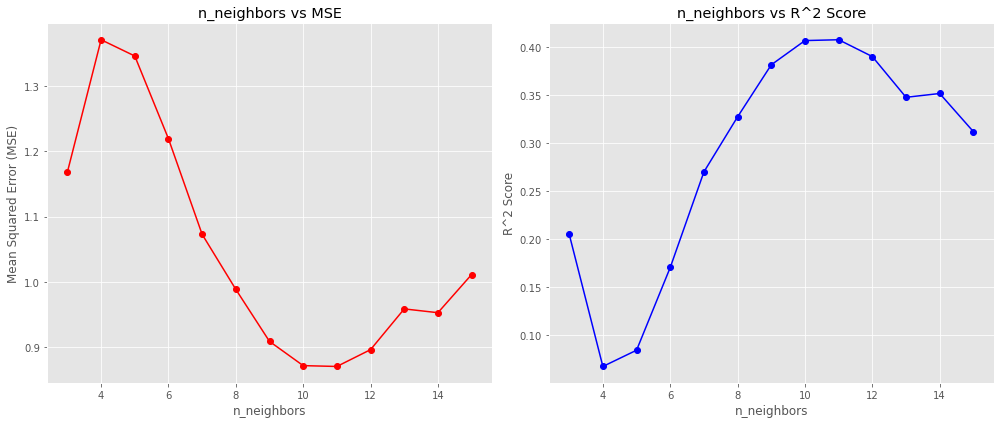

[0.20511255107156567, 0.06754047631997784, 0.08445963200186613, 0.17052824296540559, 0.2699612762294147, 0.3272368599307227, 0.38133734006079956, 0.406529609349211, 0.4073955635615053, 0.38988943847204616, 0.3475211358120246, 0.3514757992119799, 0.3118003648533132]


In [16]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors_range = range(3, 16)

mse_scores = []
r2_scores = []

for n_neighbors in n_neighbors_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(X_train, Y_train)
    Y_pred = knn_regressor.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_neighbors_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('n_neighbors vs MSE')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(n_neighbors_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('n_neighbors vs R^2 Score')
plt.xlabel('n_neighbors')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

## Neural network regression

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataC

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1624: DataC

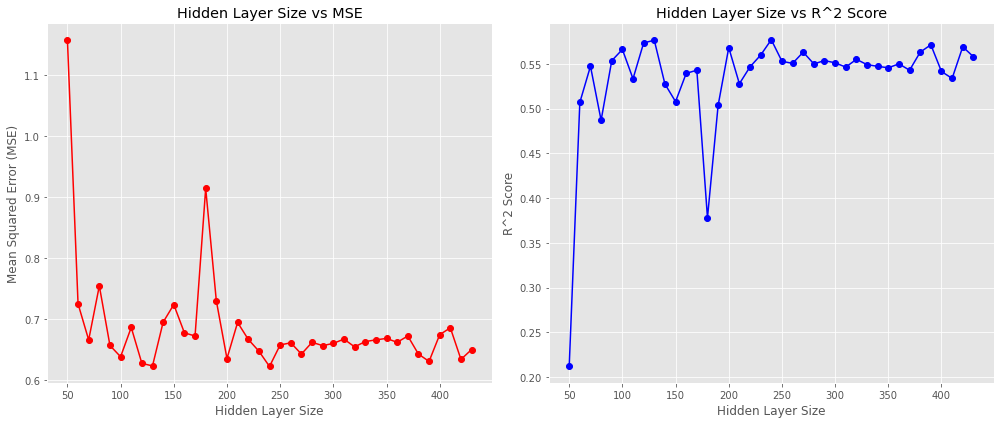

[0.21182860718072394, 0.5068202280007805, 0.5472207571969198, 0.48682179037271867, 0.5533839347964065, 0.5659650017145175, 0.5332401295345663, 0.5733363254899854, 0.5762226114848249, 0.5273609200035566, 0.5077049345046944, 0.5392513876714171, 0.5428087917163527, 0.3779081200974228, 0.5034260269491431, 0.5679778379983855, 0.527683328446662, 0.5465343990310169, 0.5596854540031577, 0.5768269015737271, 0.5528023972948513, 0.5503892022975525, 0.5629666009033564, 0.5498544419660649, 0.5535371476345481, 0.5510456436705884, 0.5462482646942979, 0.5549405056598011, 0.5490284869784273, 0.5471089151160684, 0.5454792705988434, 0.5498715588252719, 0.5427673236341715, 0.5629746430155912, 0.5711723317303693, 0.5413500633089439, 0.5336240779182351, 0.568939615630507, 0.5578935652196575]


In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

hidden_layer_sizes_range = range(50, 440, 10)

mse_scores = []
r2_scores = []

for size in hidden_layer_sizes_range:
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', solver='adam', max_iter=1000, random_state=42)
    mlp_regressor.fit(X_train_scaled, Y_train)
    Y_pred = mlp_regressor.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hidden_layer_sizes_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('Hidden Layer Size vs MSE')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(hidden_layer_sizes_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('Hidden Layer Size vs R^2 Score')
plt.xlabel('Hidden Layer Size')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(r2_scores)

In [6]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_1.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

  File "C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7769413159434508	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.5, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=6, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.9000000000000001)

-2	0.7

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_2.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/550 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7769413159434508	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.5, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=6, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.9000000000000001)

-2	0.7

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_3.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/2550 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7769413159434508	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.5, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=6, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.9000000000000001)

-2	0.7

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, population_size=50, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_4.py')

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


30 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/5050 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Generation 1 - Current Pareto front scores:

-1	0.7769413159434508	GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.95, GradientBoostingRegressor__learning_rate=1.0, GradientBoostingRegressor__loss=huber, GradientBoostingRegressor__max_depth=10, GradientBoostingRegressor__max_features=0.5, GradientBoostingRegressor__min_samples_leaf=17, GradientBoostingRegressor__min_samples_split=6, GradientBoostingRegressor__n_estimators=100, GradientBoostingRegressor__subsample=0.9000000000000001)

-2	0.7

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_5.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Ge

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_6.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Ge

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_7.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/5100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Ge

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, population_size=100, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_8.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='epsilon_insensitive' are not supported when dual=False, Parameters: penalty='l2', loss='epsilon_insensitive', dual=False.
_pre_test decorator: _random_mutation_operator: num_test=1 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 (slice(None, None, None), 0).
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.

Ge

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_9.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/1200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by _RidgeGCV..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutati

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_10.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/2200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by _RidgeGCV..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutati

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_11.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/10200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by _RidgeGCV..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutati

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [17]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, population_size=200, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_12.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/20200 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required by _RidgeGCV..
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 LassoLarsCV.__init__() got an unexpected keyword argument 'normalize'.
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutati

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [18]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=5, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_13.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/2400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'hube

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=10, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_14.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/4400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'hube

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=50, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_15.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/20400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'hube

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=100, population_size=400, verbosity=3, scoring='r2', random_state=42)
#meaning of parameters = #http://epistasislab.github.io/tpot/api/

tpot.fit(X_train, Y_train)
50
print('training r2 is : ', tpot.score(X_train, Y_train))
print('testing r2 is : ',tpot.score(X_test, Y_test))

tpot.export('tpot_DPP_DTT_pipeline_combined_MYL_16.py')

30 operators have been imported by TPOT.


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/40400 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'huber', 'squared_epsilon_insensitive', 'squared_error'}. Got 'squared_loss' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'ls' instead..
_pre_test decorator: _random_mutation_operator: num_test=1 Automatic alpha grid generation is not supported for l1_ratio=0. Please supply a grid by providing your estimator with the appropriate `alphas=` argument..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of GradientBoostingRegressor must be a str among {'huber', 'absolute_error', 'quantile', 'squared_error'}. Got 'lad' instead..
_pre_test decorator: _random_mutation_operator: num_test=0 The 'loss' parameter of SGDRegressor must be a str among {'epsilon_insensitive', 'hube

C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Myeongyeon Lee\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

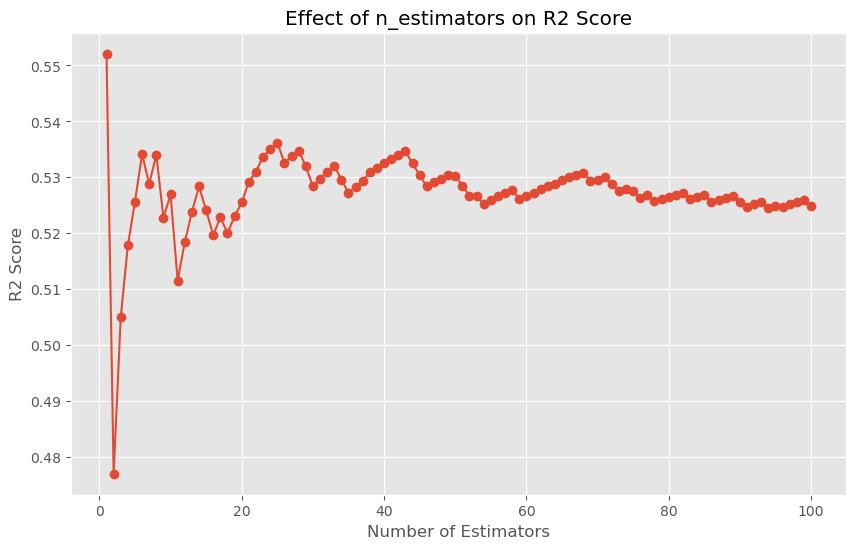

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score

# Define a range of `n_estimators` to evaluate
n_estimators_range = np.arange(1, 101, 1)

# Initialize a list to store the R2 scores for each model
r2_scores = []

# Evaluate Extra Trees model with different `n_estimators`
for n_estimators in n_estimators_range:
    model = ExtraTreesRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(Y_test, predictions)
    r2_scores.append(r2)

# Plotting n_estimators vs R2
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-')
plt.title('Effect of n_estimators on R2 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

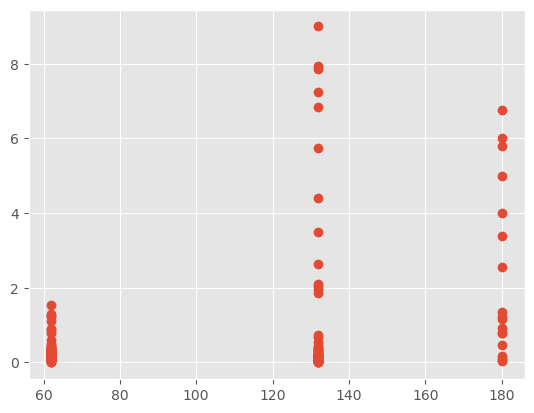

In [6]:
a=DPP_DTT_df[['solvent_boiling_point']]
plt.plot(a,DPP_DTT_Y, 'o')